# The dataset

We will explore regression models using a standard bencharking dataset, the AMES Housing data. This comprises data about individual housing property in AMES, Iowa, USA, from 2006-2010. More information on the data set can be found here: 
Dataset description -  http://jse.amstat.org/v19n3/decock.pdf
Dataset documentation http://jse.amstat.org/v19n3/decock/DataDocumentation.txt
The actual dataset in text, tab-separated format: http://jse.amstat.org/v19n3/decock/AmesHousing.txt

In [1]:
import pandas as pd

We will not use the complete set of attributes in the dataset but we will downselect specific ones: 

Overall Qual (Ordinal): Rates the overall material and finish of the house
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
       
Overall Cond (Ordinal): Rates the overall condition of the house
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor 
       
Gr Liv Area (Continuous): Above grade (ground) living area square feet

entral Air (Nominal): Central air conditioning
       N	No
       Y	Yes

total Bsmt SF (Continuous): Total square feet of basement area

SalePrice (Continuous): Sale price in $$

In [2]:
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Central Air', 'Total Bsmt SF', 'SalePrice']

In [3]:
df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt',sep='\t',usecols=columns)

We can also read the data set locally

In [4]:
df = pd.read_csv('AmesHousing.txt',sep='\t',usecols=columns)

Let's inspect the first 5 lines of the dataframe populated with the data

In [4]:
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


All attributes above are numerical, apart from Central Air

Let's inspect also the shape / dimensions of the dataset

In [5]:
df.shape

(2930, 6)

We can convert the Central Air varariable to a numerical one by mapping 'N' values to 0 and 'Y' values to 1 and inspect the data again.

In [6]:
df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})

In [7]:
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,1,1656,215000
1,5,6,882.0,1,896,105000
2,6,6,1329.0,1,1329,172000
3,7,5,2110.0,1,2110,244000
4,5,5,928.0,1,1629,189900


Before progressing any further, let's check for missing values using the isnull() method of the dataframe

In [8]:
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

We have counted '1' missing value in the Total Bsmt SF attribute. As this is in just one record, the simplest approach without sacrificing much information from the dataset is to remove this record. We will use a method which drops "non a number" records. 

In [9]:
df = df.dropna(axis=0)

In [11]:
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

Good - no missing values any more

# Applying Tree Regression

In [11]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)

you may use pip install 
in CMD (command prompt) to install the above libraries if they are not already installed
pip install seaborn

In [13]:
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

In [20]:
tree = DecisionTreeRegressor(max_depth=5)

In [21]:
tree.fit(X, y)

DecisionTreeRegressor(max_depth=5)

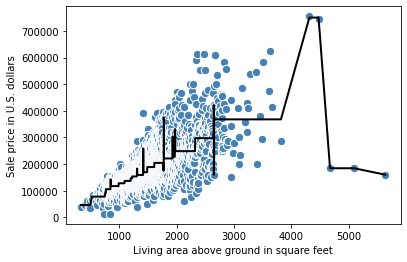

In [22]:
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.show()

Go ahead and experiment further with different tree depths. Also experiment with other attributes, for example Overall Qual. 

# Applying Random Forest Regression

In [23]:
from sklearn.model_selection import train_test_split
import numpy as np

In [24]:
target = 'SalePrice'
features = df.columns[df.columns != target]
X = df[features].values
y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=123)

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [27]:
forest = RandomForestRegressor(
n_estimators=1000, 
criterion='squared_error', 
random_state=1, 
n_jobs=-1)

In [28]:
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'MAE train: {mae_train:.2f}')
print(f'MAE test: {mae_test:.2f}')
r2_train = r2_score(y_train, y_train_pred)
r2_test =r2_score(y_test, y_test_pred)
print(f'R^2 train: {r2_train:.2f}')
print(f'R^2 test: {r2_test:.2f}')

MAE train: 8305.18
MAE test: 20821.77
R^2 train: 0.98
R^2 test: 0.85


Note that perfomance over the test data is significantly inferior. Therefore this is a case of overfit. We can have a look at the residual errors next. 

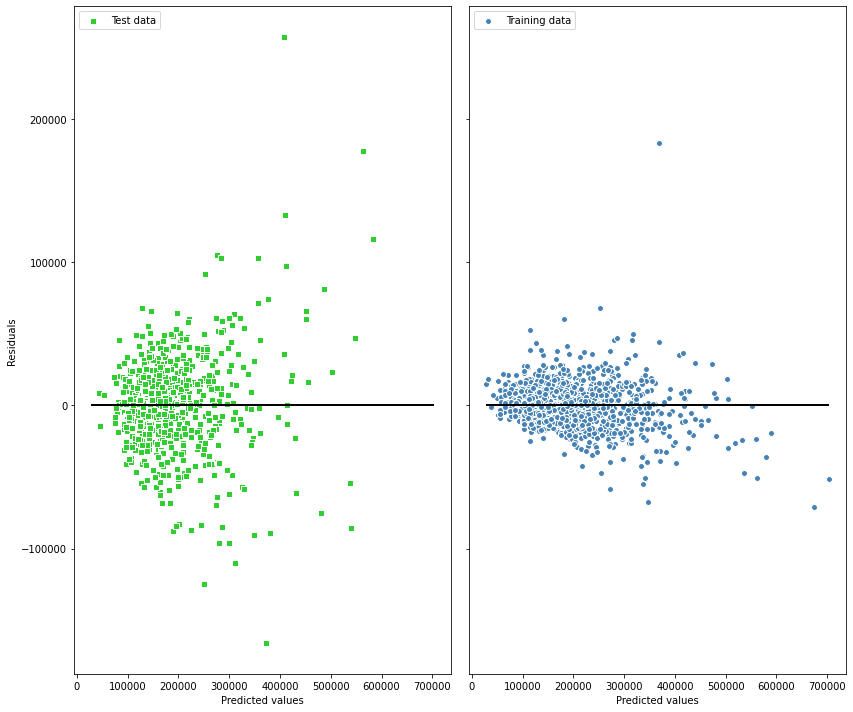

In [36]:
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 10), sharey=True)
ax1.scatter(y_test_pred, y_test_pred - y_test,
                 c='limegreen', marker='s', edgecolor='white',
                 label='Test data')
ax2.scatter(y_train_pred, y_train_pred - y_train,
                 c='steelblue', marker='o', edgecolor='white',
                 label='Training data')
ax1.set_ylabel('Residuals')
for ax in (ax1, ax2):
         ax.set_xlabel('Predicted values')
         ax.legend(loc='upper left')
         ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100,
                   color='black', lw=2)
plt.tight_layout()
plt.show()